In [1]:
from sklearn import preprocessing
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as mp
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from imblearn.over_sampling import SMOTE
from transformers import AutoTokenizer, AutoModelForMaskedLM
from sentence_transformers import SentenceTransformer
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [6]:
embeds = pd.read_excel('final_sheet.xlsx')
num_set = pd.read_excel('final_numeric.xlsx')

X = num_set.iloc[0:, 0:-2]
X = pd.DataFrame(X)
print(X)
Y = num_set.iloc[0:, -1]
Y = pd.DataFrame(Y)
print(Y)


      Embedding_0  Embedding_1  Embedding_2  Embedding_3  Embedding_4  \
0        0.285323    -0.057623    -0.341623    -0.131081    -1.339097   
1        0.164875    -0.109333    -0.442139    -0.108664    -0.830387   
2        0.078602    -0.135626    -0.374601     0.074517    -0.984489   
3        0.374524    -0.510557    -0.512152     0.409759    -0.693743   
4        0.247161    -0.384300    -0.076632     0.139193    -0.417148   
...           ...          ...          ...          ...          ...   
1122    -0.044343    -0.304357    -0.030916     0.057781    -1.315475   
1123    -0.013942    -0.266623    -0.121222     0.128339    -1.290057   
1124    -0.036179    -0.443423    -0.079330     0.090317    -1.292111   
1125     0.053002    -0.165108    -0.166723     0.144056    -1.332855   
1126     0.124928    -0.367228    -0.142679     0.338609    -1.177999   

      Embedding_5  Embedding_6  Embedding_7  Embedding_8  Embedding_9  ...  \
0        0.159932     0.053932    -0.639942  

# PRINCIPAL COMPONENT ANALYSIS

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with n_components (number of components)
n_components = 2  # Choose the number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# X_pca now contains the transformed data with reduced dimensions
print(X_pca)


            PC1       PC2
0      6.673309 -4.241883
1     -1.756012 -9.155183
2      5.034252 -7.458380
3     -6.564388 -0.926598
4      1.559586 -5.219899
...         ...       ...
1122   8.897993 -8.267756
1123   8.387515 -7.250854
1124   9.114066 -8.500908
1125  10.972376 -8.983228
1126  11.069384 -8.739545

[1127 rows x 2 columns]


## Visualization

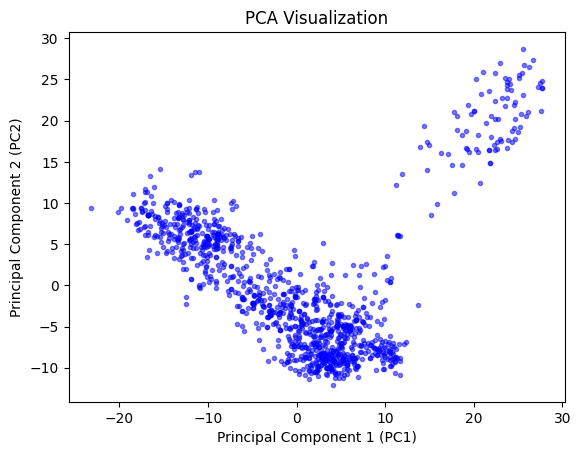

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_pca['PC1'], X_pca['PC2'], c='blue', alpha=0.5, marker='.')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Visualization')
plt.show()


## Train-Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [22]:

print("The number of samples for class 0 (incorrect) = ", len(Y[Y['class_encoded']==0]))
print("The number of samples for class 1 (partially correct) = ", len(Y[Y['class_encoded']==1]))
print("The number of samples for class 2 (correct) = ", len(Y[Y['class_encoded']==2]))


The number of samples for class 0 (incorrect) =  483
The number of samples for class 1 (partially correct) =  317
The number of samples for class 2 (correct) =  327


# TRADITIONAL MODELS

#### Cross Validation

In [39]:
def crossvalidation(model_name,X,Y):
    # Define the scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1_score': make_scorer(f1_score, average='weighted')
    }
    
    cv = KFold(n_splits=10, random_state=42, shuffle=True)

    # Perform cross-validation
    cv_results = cross_validate(model_name, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
    
    # Extract and print results
    accuracy_mean = cv_results['test_accuracy'].mean()
    accuracy_std = cv_results['test_accuracy'].std()
    
    precision_mean = cv_results['test_precision'].mean()
    precision_std = cv_results['test_precision'].std()
    
    recall_mean = cv_results['test_recall'].mean()
    recall_std = cv_results['test_recall'].std()
    
    f1_score_mean = cv_results['test_f1_score'].mean()
    f1_score_std = cv_results['test_f1_score'].std()
    
    print('Accuracy: Mean -', accuracy_mean, ' Std -', accuracy_std)
    print('Precision: Mean -', precision_mean, ' Std -', precision_std)
    print('Recall: Mean -', recall_mean, ' Std -', recall_std)
    print('F1 Score: Mean -', f1_score_mean, ' Std -', f1_score_std)
    

## KNN

### FINDING THE BEST K VALUE

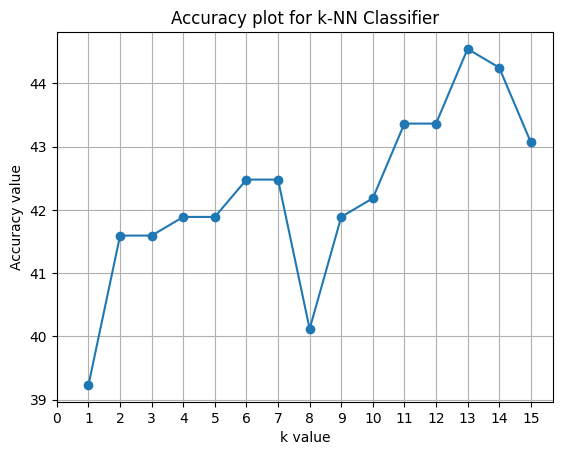

In [40]:
new_accuracy_vals = []
for k in range(1, 16):
    neigh2 = KNeighborsClassifier(n_neighbors=k)
    neigh2.fit(X_train, Y_train)
    predictions = neigh2.predict(X_test)    
    accuracy_k = accuracy_score(Y_test, predictions)
    new_accuracy_vals.append(accuracy_k*100)

mp.plot(range(1,16), new_accuracy_vals, marker='o')
mp.title('Accuracy plot for k-NN Classifier')
mp.xlabel('k value')
mp.ylabel('Accuracy value')
mp.grid(True)
mp.xticks(range(0, 16))
# mp.yticks(range(0,100,5))
mp.show()


### IMPLEMENTING KNN

In [41]:
model_knn = KNeighborsClassifier(n_neighbors=13)
model_knn.fit(X_train, Y_train)

train_predictions = model_knn.predict(X_train)
test_predictions = model_knn.predict(X_test)


### PERFORMANCE OF KNN

#### 1. CONFUSION MATRIX

In [42]:

train_confusion_matrix = confusion_matrix(Y_train, train_predictions)
test_confusion_matrix = confusion_matrix(Y_test, test_predictions)
print("Confusion Matrix for Training Data :\n", train_confusion_matrix)
print("Confusion Matrix for Testing Data :\n", test_confusion_matrix)

Confusion Matrix for Training Data :
 [[266  33  45]
 [103  69  39]
 [ 98  26 109]]
Confusion Matrix for Testing Data :
 [[107  14  18]
 [ 70  18  18]
 [ 56  12  26]]


#### 2. CLASSIFICATION REPORT

In [43]:

train_classification_report = classification_report(Y_train, train_predictions)
test_classification_report = classification_report(Y_test, test_predictions)
print("\nClassification Report for Training Data):\n", train_classification_report)
print("\nClassification Report for Testing Data):\n", test_classification_report)

print("Since this model has same performance and it gives good results on both training and test data, it is a regular fit.")


Classification Report for Training Data):
               precision    recall  f1-score   support

           0       0.57      0.77      0.66       344
           1       0.54      0.33      0.41       211
           2       0.56      0.47      0.51       233

    accuracy                           0.56       788
   macro avg       0.56      0.52      0.52       788
weighted avg       0.56      0.56      0.55       788


Classification Report for Testing Data):
               precision    recall  f1-score   support

           0       0.46      0.77      0.58       139
           1       0.41      0.17      0.24       106
           2       0.42      0.28      0.33        94

    accuracy                           0.45       339
   macro avg       0.43      0.41      0.38       339
weighted avg       0.43      0.45      0.40       339

Since this model has same performance and it gives good results on both training and test data, it is a regular fit.


## cross validation

In [44]:
crossvalidation(model_knn,X_pca,Y)

Accuracy: Mean - 0.4534213021491782  Std - 0.04821344467889006
Precision: Mean - 0.4453189984733089  Std - 0.05125908521604986
Recall: Mean - 0.4534213021491782  Std - 0.04821344467889006
F1 Score: Mean - 0.43524795199025695  Std - 0.05139759229534609


# DECISION TREE CLASSIFIER

Training Set Accuracy: 0.9809644670050761
Testing Set Accuracy: 0.3952802359882006
Tree Depth: 26
Predicted class=  0


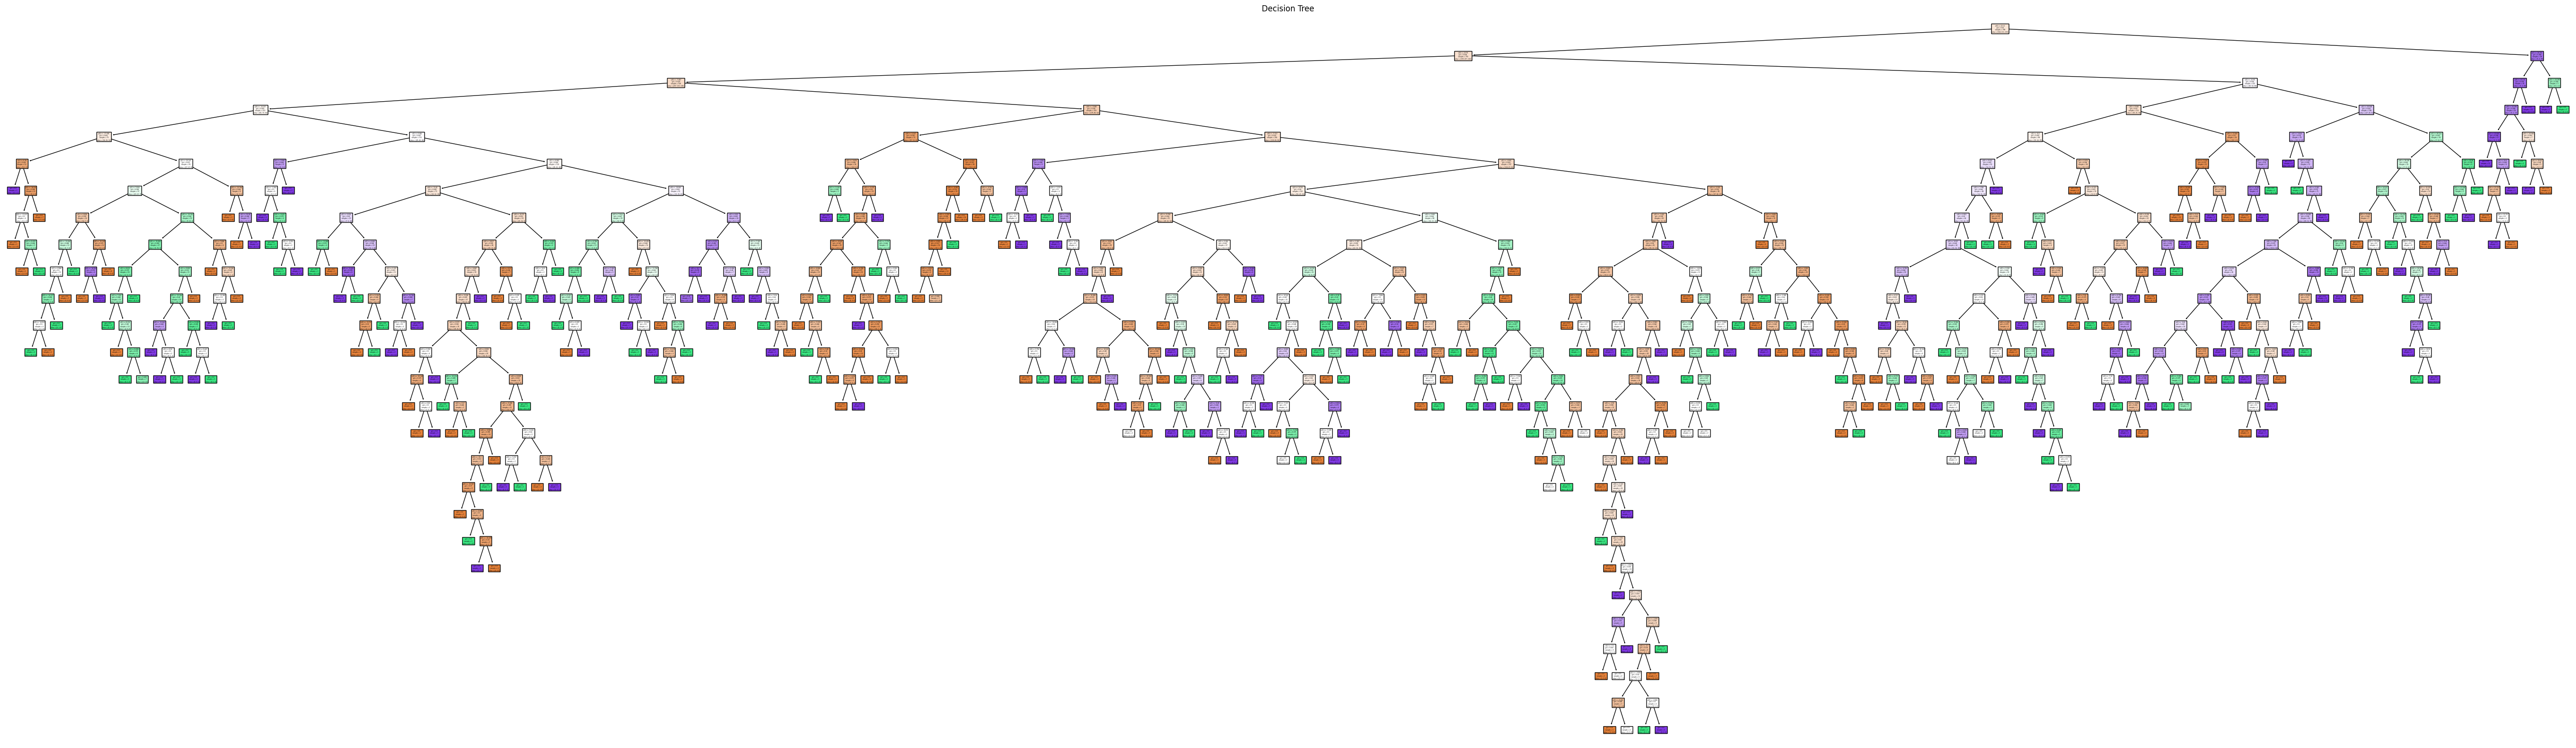

In [45]:
model_dtree = DecisionTreeClassifier()
model_dtree.fit(X_train , Y_train )
training_accuracy = model_dtree.score(X_train , Y_train )
testing_accuracy = model_dtree.score(X_test, Y_test)
print("Training Set Accuracy:", training_accuracy)
print("Testing Set Accuracy:", testing_accuracy)
tree_depth = model_dtree.get_depth()
print("Tree Depth:", tree_depth)
# print(X_test.iloc[10])
dtreeprediction = model_dtree.predict([X_test.iloc[10]])
print("Predicted class= ",dtreeprediction[0])
mp.figure(figsize=(70, 20))
plot_tree(model_dtree, filled=True)
mp.title("Decision Tree")
mp.show()


### Cross validation

In [46]:
crossvalidation(model_dtree,X_pca,Y)

Accuracy: Mean - 0.42332490518331223  Std - 0.0378373533361012
Precision: Mean - 0.4311495830236935  Std - 0.03601518860668417
Recall: Mean - 0.42332490518331223  Std - 0.0378373533361012
F1 Score: Mean - 0.42357390908896325  Std - 0.036326022169052036


# MLP

In [47]:
model_mlp = MLPClassifier(hidden_layer_sizes=(300, 50), activation='relu', solver='adam', max_iter=1000)
model_mlp.fit(X_train, Y_train) # Fitting the model to the training data
mlp_y_pred = model_mlp.predict(X_test) #predicting

mlp_accuracy = accuracy_score(Y_test, mlp_y_pred)
mlp_report = classification_report(Y_test, mlp_y_pred)

print("Accuracy of the MLP classifier:", mlp_accuracy)
print("Classification Report:\n", mlp_report)

Accuracy of the MLP classifier: 0.45722713864306785
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.83      0.59       139
           1       0.44      0.28      0.34       106
           2       0.50      0.11      0.18        94

    accuracy                           0.46       339
   macro avg       0.47      0.41      0.37       339
weighted avg       0.46      0.46      0.40       339



### Cross validation

In [48]:
crossvalidation(model_mlp,X_pca,Y)

Accuracy: Mean - 0.4498577749683944  Std - 0.05201534372295678
Precision: Mean - 0.45390662302535256  Std - 0.11567835844219197
Recall: Mean - 0.4498577749683944  Std - 0.05201534372295678
F1 Score: Mean - 0.3766414592714625  Std - 0.06836226009744517


# SVM

In [49]:
model_SVM = svm.SVC()
# training the SVM classifier on the training set
model_SVM.fit(X_train, Y_train)
# getting the support vectors
support_vectors = model_SVM.support_vectors_
# Study the support vectors
print("Number of support vectors:", len(support_vectors))
print("Support vectors:\n", support_vectors)

Number of support vectors: 711
Support vectors:
 [[  0.24642747  -6.4185911 ]
 [ -1.52648345  -2.00929722]
 [-12.02673162   5.54224364]
 ...
 [ -3.4852767   -0.376406  ]
 [  8.26518132  -3.87644383]
 [  1.7747425   -7.80172001]]


### Performance

In [50]:
accuracySVM = model_SVM.score(X_test, Y_test) #calculating accuracy of the SVM
print("Accuracy on the test set: ", accuracySVM)
#creating the predicted class values
predicted_labels_ = model_SVM.predict(X_test)
Y_test_ = (np.array(Y_test).flatten()).tolist()
predicted_labels_=np.array(predicted_labels_).tolist()
print("Calculated class labels for the testing set: \n", Y_test_)
print("Predicted class labels for the testing set: \n", predicted_labels_)
correct=0
#comparing the predictions against actual class values
for i in range(len(Y_test_)):
    if(predicted_labels_[i]==Y_test_[i]):
        correct+=1

# correct_predictions = sum(predicted_labels_ == Y_test)
total_samples = len(Y_test_)                                     

# Calculate accuracy
accuracySVC = correct / total_samples
print("Accuracy on the test set: ", accuracySVC)


confusion_matrix(Y_test, predicted_labels_)

Accuracy on the test set:  0.4277286135693215
Calculated class labels for the testing set: 
 [2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 

array([[134,   1,   4],
       [ 97,   2,   7],
       [ 84,   1,   9]], dtype=int64)

### Cross validation

In [51]:
crossvalidation(model_SVM,X_pca,Y)

Accuracy: Mean - 0.44718710493046776  Std - 0.03596713021491782
Precision: Mean - 0.45165193597622577  Std - 0.12883284152962893
Recall: Mean - 0.44718710493046776  Std - 0.03596713021491782
F1 Score: Mean - 0.3596555547880739  Std - 0.060741645315191176


# RANDOM FOREST

In [52]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
Y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.415929203539823


### Cross Validation

In [53]:
crossvalidation(model_rf,X_pca,Y)

Accuracy: Mean - 0.4667983565107459  Std - 0.041822916794744217
Precision: Mean - 0.46457391055693414  Std - 0.054378001469591375
Recall: Mean - 0.4667983565107459  Std - 0.041822916794744217
F1 Score: Mean - 0.46019500303172756  Std - 0.044000763418343074


# Naive Bayes classifier

In [54]:
model_NB = GaussianNB() #training naive bayes classifier
model_NB.fit(X_train, Y_train)
# Predict on the test set
Y_predicted_gauss = model_NB.predict(X_test)
accuracy = accuracy_score(Y_test, Y_predicted_gauss)
print("Accuracy of the Naive Bayes model: ", accuracy)


Accuracy of the Naive Bayes model:  0.41887905604719766


### Cross Validation

In [55]:
crossvalidation(model_NB,X_pca,Y)

Accuracy: Mean - 0.45602085967130224  Std - 0.04245552116387524
Precision: Mean - 0.45619765360620423  Std - 0.07918281610793447
Recall: Mean - 0.45602085967130224  Std - 0.04245552116387524
F1 Score: Mean - 0.3879893871341499  Std - 0.058083494775028104


# Logistic Regression

In [56]:
model_logistic = LogisticRegression(solver="liblinear")
model_logistic.fit(X_train, Y_train)

predicted_logistic_reg = model_logistic.predict(X_test)

#calculating accuracy score of the model
accuracyy = accuracy_score(Y_test, predicted_logistic_reg)
print("Accuracy of the logistic regression classifier: ", accuracyy)

Accuracy of the logistic regression classifier:  0.4247787610619469


### Cross validation

In [57]:
crossvalidation(model_logistic,X_pca,Y)

Accuracy: Mean - 0.45161188369152977  Std - 0.03674417156280538
Precision: Mean - 0.39477371808668044  Std - 0.0487125283332854
Recall: Mean - 0.45161188369152977  Std - 0.03674417156280538
F1 Score: Mean - 0.34173654635295303  Std - 0.044267014100851584


# ADA-BOOST

In [58]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # Using a decision tree stump as the base estimator
model_ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Training the AdaBoost classifier
model_ada_boost.fit(X_train, Y_train)

# Making predictions on the test set
predictions = model_ada_boost.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy of AdaBoost classifier: {accuracy}")

Accuracy of AdaBoost classifier: 0.45132743362831856


### Cross validation

In [59]:
crossvalidation(model_ada_boost,X_pca,Y)

Accuracy: Mean - 0.4453460809102402  Std - 0.041785255923654535
Precision: Mean - 0.40869117796679333  Std - 0.042617135959417435
Recall: Mean - 0.4453460809102402  Std - 0.041785255923654535
F1 Score: Mean - 0.39583351222685687  Std - 0.052439453111806665


# XGBOOST

In [60]:
# Initialize and train the XGBoost model
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_xgboost = model_xgboost.predict(X_test)

# Evaluate the model (for example, using accuracy)
accuracy = accuracy_score(Y_test, y_pred_xgboost)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.41


### Cross Validation

In [61]:
crossvalidation(model_xgboost,X_pca,Y)

Accuracy: Mean - 0.4553018331226295  Std - 0.03947538324589799
Precision: Mean - 0.45568897975581757  Std - 0.043259777700834244
Recall: Mean - 0.4553018331226295  Std - 0.03947538324589799
F1 Score: Mean - 0.45149337209970747  Std - 0.04105544468753002


# CATBOOST

In [62]:
# Initializing CatBoost classifier
model_catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)

# Training the CatBoost classifier
model_catboost.fit(X_train, Y_train, eval_set=(X_test, Y_test), early_stopping_rounds=10, verbose=10)

# Making predictions on the test set
catboost_predictions = model_catboost.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(Y_test, catboost_predictions)
print(f"Accuracy of CatBoost classifier: {accuracy}")

0:	learn: 1.0842841	test: 1.0889021	best: 1.0889021 (0)	total: 162ms	remaining: 16s
10:	learn: 1.0225453	test: 1.0644581	best: 1.0644581 (10)	total: 214ms	remaining: 1.73s
20:	learn: 0.9982015	test: 1.0625401	best: 1.0617066 (18)	total: 246ms	remaining: 924ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 1.061706589
bestIteration = 18

Shrink model to first 19 iterations.
Accuracy of CatBoost classifier: 0.4277286135693215


### Cross Validation

In [63]:
crossvalidation(model_catboost,X_pca,Y)

Accuracy: Mean - 0.4729535398230089  Std - 0.039417963143322195
Precision: Mean - 0.4614882533434934  Std - 0.04270247228284443
Recall: Mean - 0.4729535398230089  Std - 0.039417963143322195
F1 Score: Mean - 0.44100946753010783  Std - 0.0431070023519076
